# Football Penalties EDA 

In this file we explore the 'comb_plays_track_data.csv' file to see what we can gather in terms of penalties being called during a play on a given down. The column in question that contains information on the penalties is 'penaltyCodes'. This shows the behavior of the data for the first 8 weeks of the nfl season. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#Read in the requisite file
new_df=pd.read_csv('comb_plays_track_data.csv')

/Users/andrewcastillo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#creating the target variable on the penaltyCodes column

#0 if no penalty,1 if there was a penalty. 
new_df['penaltyCodes']=new_df.penaltyCodes.fillna(0)
new_df['penaltyCodes']=new_df.penaltyCodes.apply(lambda x: 0 if x==0 else 1)

In [5]:
pd.set_option('display.max_columns', None)
new_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,new_Id,defender,coverage_count,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,0,NaN,C,10,10,0.261827,False
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,2018090600_75,True,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,0,NaN,C,10,10,0.261827,False
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,0,NaN,C,10,10,0.261827,False
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,2018090600_75,True,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,0,NaN,C,10,10,0.261827,False
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,0,NaN,C,10,10,0.261827,False


In [6]:
#Plays data frame 
plays_df=pd.read_csv('../nfl_data/plays.csv')
pd.set_option('display.max_columns', None)
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


__Can we use the following countplot to help us understand which defensive formations cause the most penalties?__

In [17]:
new_df.personnelD.value_counts().index[:10]

Index(['4 DL, 2 LB, 5 DB', '3 DL, 3 LB, 5 DB', '2 DL, 4 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '2 DL, 3 LB, 6 DB', '3 DL, 2 LB, 6 DB',
       '3 DL, 4 LB, 4 DB', '4 DL, 1 LB, 6 DB', '1 DL, 4 LB, 6 DB',
       '1 DL, 5 LB, 5 DB'],
      dtype='object')

In [20]:
#take the top 10 most used defensive formations during this season
#(other formations are too small to be of significance)
def_form=new_df.personnelD.value_counts().index[:10]


In [30]:
top_10_def_df=plays_df.loc[plays_df['personnelD'].isin(def_form)]
top_10_def_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False


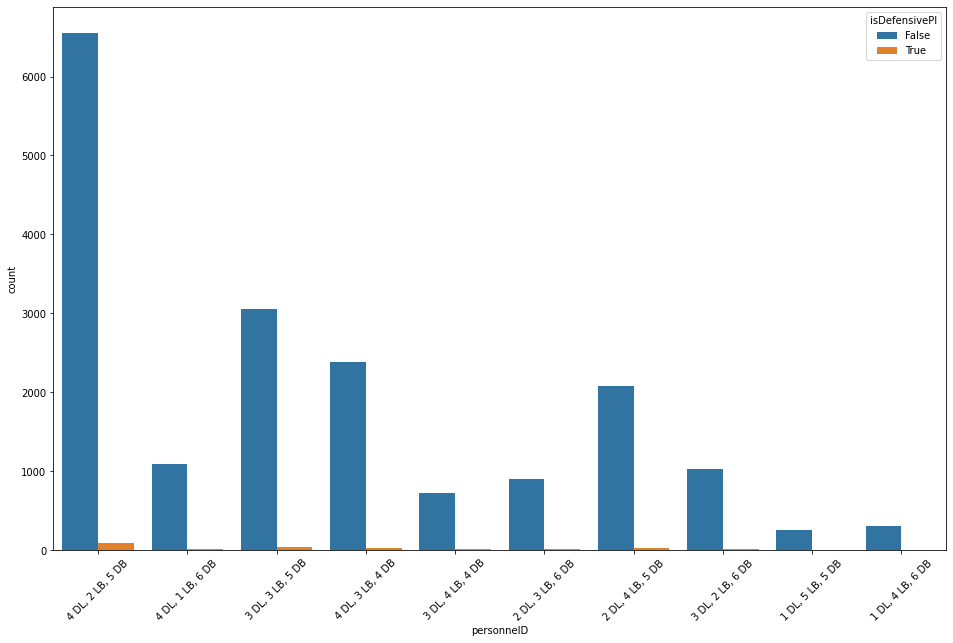

In [22]:
#Countplots with defensive formations and hueing the potential flag. 
plt.figure(figsize = (16,10))
ax=sns.countplot(x='personnelD', data=top_10_def_df, hue='isDefensivePI')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [23]:
#Gathering the formations that cause the most penalties. 
#It looks like the 4-2-5 causes the most at 95, 3-3-5 at 45, and so on. 
top_10_def_df.loc[top_10_def_df.isDefensivePI==True]['personnelD'].value_counts()


4 DL, 2 LB, 5 DB    95
3 DL, 3 LB, 5 DB    45
4 DL, 3 LB, 4 DB    24
2 DL, 4 LB, 5 DB    23
2 DL, 3 LB, 6 DB    17
3 DL, 2 LB, 6 DB    14
4 DL, 1 LB, 6 DB    13
3 DL, 4 LB, 4 DB    12
1 DL, 5 LB, 5 DB     4
1 DL, 4 LB, 6 DB     4
Name: personnelD, dtype: int64

__What about the offensive formations that caused the most penalties?__

In [24]:
#get the top 10 most used offensive personnel 
new_df.personnelO.value_counts().index[:10]

Index(['1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR', '2 RB, 1 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '1 RB, 0 TE, 4 WR', '0 RB, 1 TE, 4 WR',
       '2 RB, 2 TE, 1 WR', '2 RB, 0 TE, 3 WR', '0 RB, 2 TE, 3 WR',
       '6 OL, 1 RB, 1 TE, 2 WR'],
      dtype='object')

In [25]:
#take the top 10 most used offensive formations during this season
#(other formations are too small to be of significance)
off_form=new_df.personnelO.value_counts().index[:10]

In [31]:
top_10_off_df=plays_df.loc[plays_df['personnelO'].isin(off_form)]
top_10_off_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False


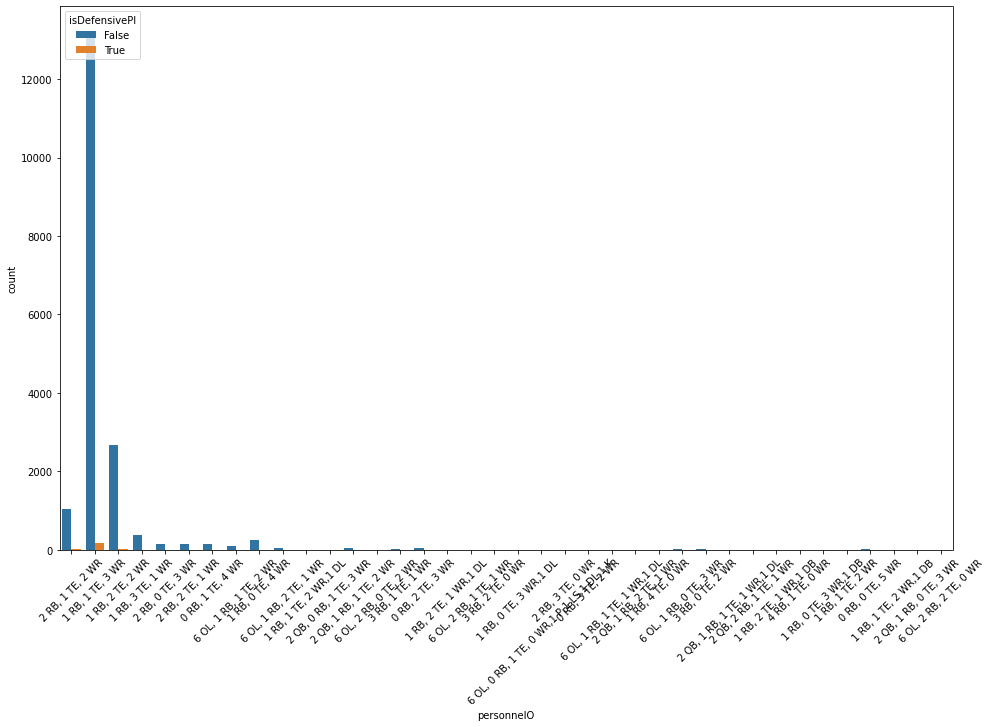

In [32]:
#Countplots with defensive formations and hueing the potential flag. 
plt.figure(figsize = (16,10))
ax=sns.countplot(x='personnelO', data=top_10_def_df, hue='isDefensivePI')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

__Look at the penalties and pass results.__

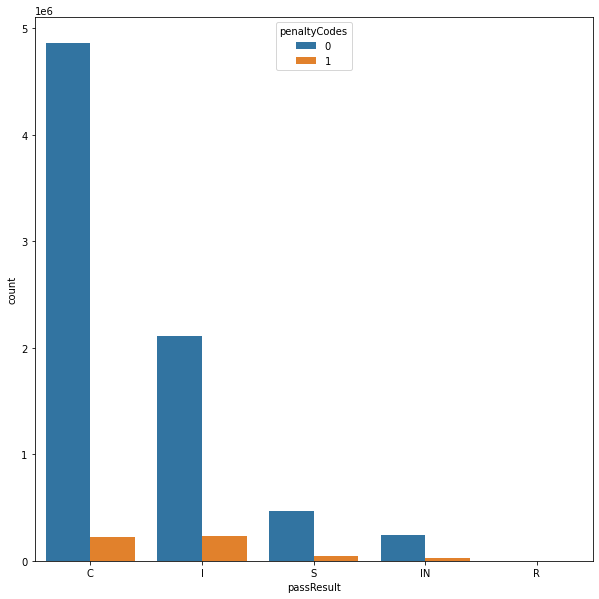

In [12]:
#Figure out which pass result has the most penalty codes 
plt.figure(figsize = (10,10))
sns.countplot(x='passResult', data=new_df, hue='penaltyCodes')
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

Looks like there were certainly more penalties thrown on incomplete passes, which is what one would expect. 

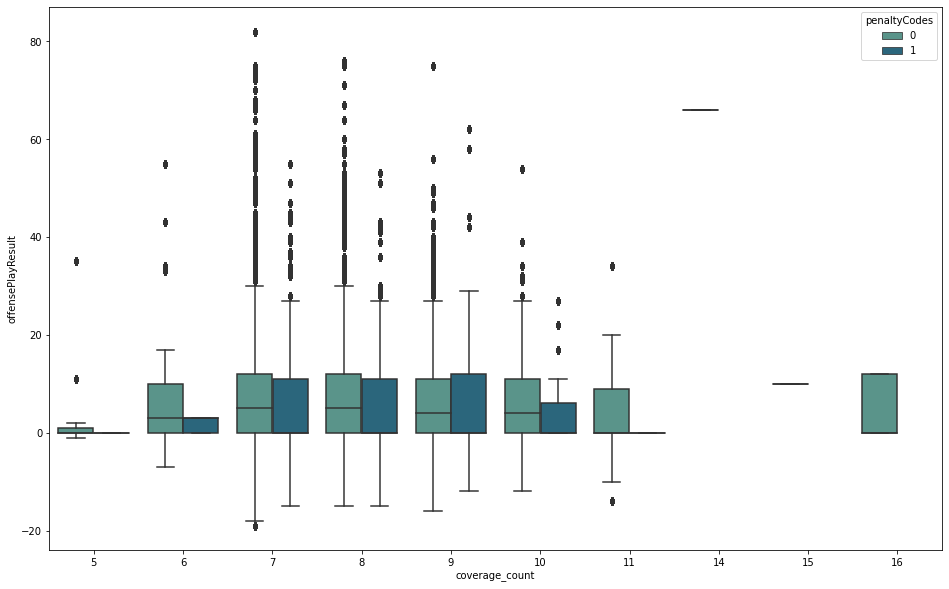

In [13]:
#Figure out which college has the most defensive backs in the NFL.   
plt.figure(figsize = (16,10))
#We can see if test preparation courses had an effect on the student's overall scores
sns.boxplot(x='coverage_count',y='offensePlayResult',data =new_df,
            hue='penaltyCodes',palette="crest")
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

Interesting that most penalties were called when there were 10 players in coverage. When there were 7 in coverage, it was almost negligible

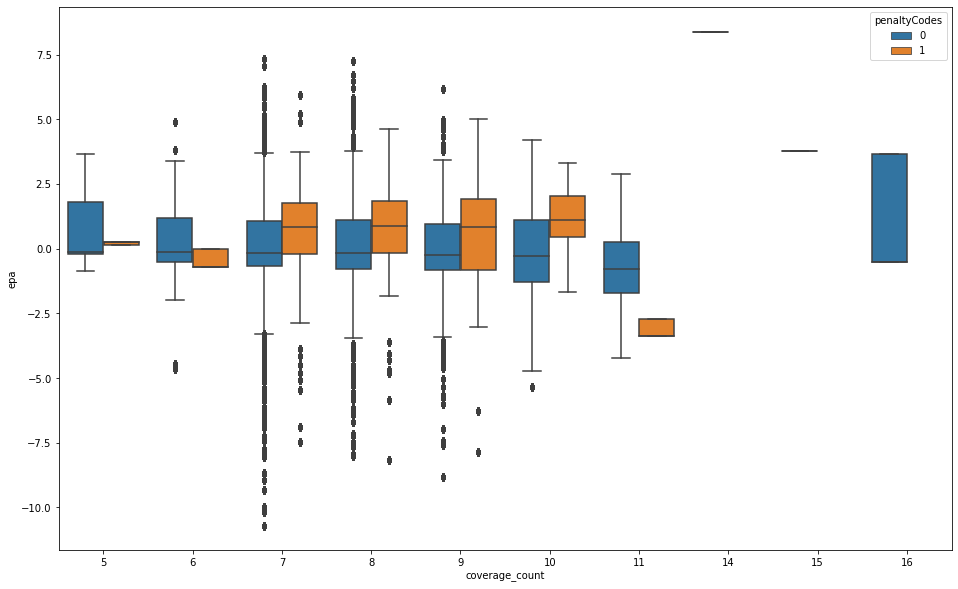

In [14]:
#Figure out which college has the most defensive backs in the NFL.   
plt.figure(figsize = (16,10))
#We can see if test preparation courses had an effect on the student's overall scores
sns.boxplot(x='coverage_count',y='epa',data =new_df,
            hue='penaltyCodes')
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

From this box plot it seems like the penalty codes mostly occured when there were 8 players in coverage and the epa was near 0. 

The following two plots show histograms of all the 'x' and 'y' coordinates along with their penalty codes. This shows us what we thought would be true: the position on the field of the player does have an impact whether a flag will be called or not. 

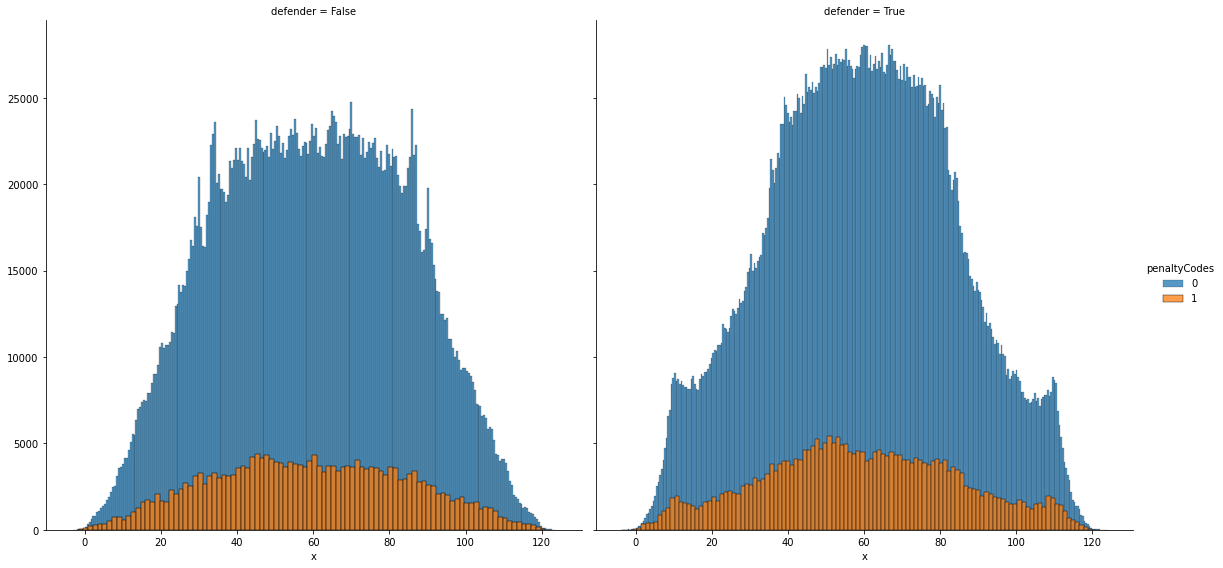

In [33]:
#getting a distribution of the x coordinates help here and hueing them with the penalty codes? 
#can we get the most likely position of the defender for a penalty to occur? 
gx = sns.FacetGrid(new_df, col='defender', hue='penaltyCodes', height=8)
gx.map(sns.histplot, 'x')
gx.add_legend()

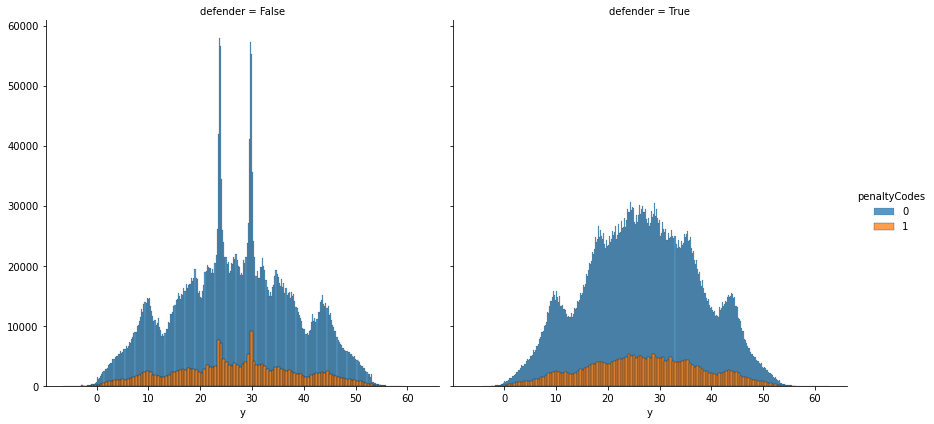

In [34]:
gy = sns.FacetGrid(new_df, col='defender', hue='penaltyCodes', height=6)
gy.map(sns.histplot, 'y')
gy.add_legend()